In [3]:
from google.colab import files
files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [4]:

import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


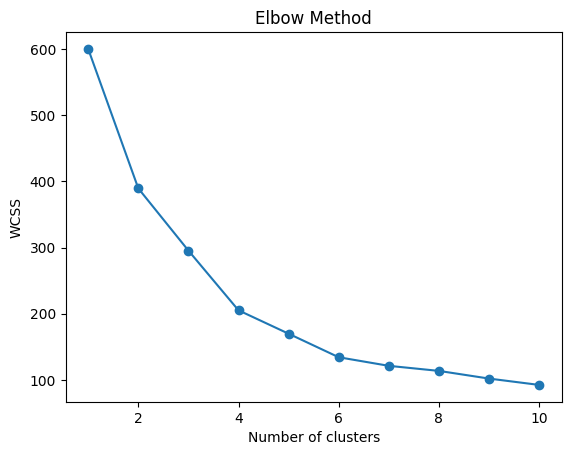

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


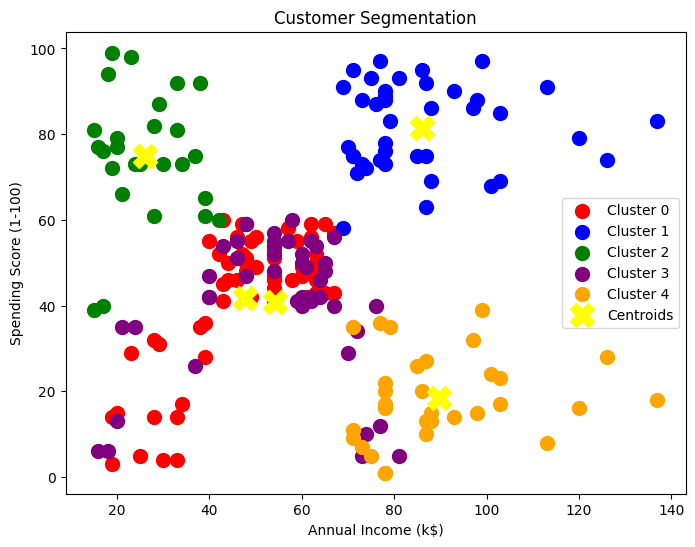

In [8]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(8, 6))

for i in range(5):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='yellow', marker='X', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [9]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871
